In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pylab
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [6]:
#import data
df = pd.read_csv('MLF_GP2_EconCycle.csv')
#dropping the atribute date because it's irrelevant
df = df.drop(['Date'],axis=1)
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

df.describe()

Size of data 223 x 18
   T1Y Index  T2Y Index  T3Y Index  T5Y Index  T7Y Index  T10Y Index  CP1M  \
0      10.41       9.86       9.50       9.20       9.14        9.10  9.75   
1      10.24       9.72       9.29       9.13       9.11        9.10  9.74   
2      10.25       9.79       9.38       9.20       9.15        9.12  9.72   
3      10.12       9.78       9.43       9.25       9.21        9.18  9.86   
4      10.12       9.78       9.42       9.24       9.23        9.25  9.77   

   CP3M   CP6M  CP1M_T1Y  CP3M_T1Y  CP6M_T1Y  Ratio T10Y/T1Y Index  \
0  9.95  10.01  0.936599  0.955812  0.961575              0.874159   
1  9.90   9.96  0.951172  0.966797  0.972656              0.888672   
2  9.85   9.87  0.948293  0.960976  0.962927              0.889756   
3  9.95   9.98  0.974308  0.983202  0.986166              0.907115   
4  9.76   9.71  0.965415  0.964427  0.959486              0.914032   

   Ratio(CP1M/CP1M_T1Y)  USPHCI  PCT 3MO FWD  PCT 6MO FWD  PCT 9MO FWD  
0              

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,Ratio T10Y/T1Y Index,Ratio(CP1M/CP1M_T1Y),USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,1.200617,0.145668,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,0.243613,0.060447,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,0.805942,0.059809,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,1.055115,0.101626,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,1.160940,0.130378,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,1.254059,0.174369,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,2.018868,0.314465,79.210000,0.020297,0.036636,0.050174


## SVM

In [8]:
#split data
X = df.iloc[:, :-1].values
y = df['USPHCI'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [10]:
# standardize data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
# pca transform data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("The explained variance ratio for 3 components are : \n", pca.explained_variance_ratio_)

The explained variance ratio for 3 components are : 
 [0.65804773 0.17594288 0.09279497]


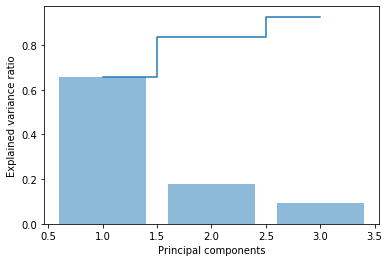

In [12]:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [16]:
SVM = svm.SVR(kernel ='rbf', C=1, gamma = 'scale')
SVM.fit(X_train_pca, y_train)
y_train_pred = SVM.predict(X_train_pca)
y_test_pred = SVM.predict(X_test_pca)

In [17]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 18.603, test: 16.400


In [18]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.799, test: 0.794


## Random Forest Regression

In [24]:
forest = RandomForestRegressor(n_estimators=100,
                                random_state=1,
                                n_jobs=-1)

forest.fit(X_train_pca, y_train)
y_train_pred = forest.predict(X_train_pca)
y_test_pred = forest.predict(X_test_pca)

In [25]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 1.108, test: 7.693


In [26]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.988, test: 0.904


## Hyperparameter Tuning

#### SVM

In [36]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVR(), param_grid, cv=10) 

grid.fit(X_train_pca, y_train) 

print("Tuned SVM Parameters: {}".format(grid.best_params_)) 
print("Best score is {}".format(grid.best_score_))

Tuned SVM Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.8566971351750609


#### Random Forest Regression

In [35]:
params_rf = {'n_estimators':[10, 20, 50, 80, 100, 200]}

forest = RandomForestRegressor()

forest_cv = GridSearchCV(forest, params_rf, cv=10)

forest_cv.fit(X_train_pca, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Regression Parameters: {}".format(forest_cv.best_params_)) 
print("Best score is {}".format(forest_cv.best_score_))

#grid_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_rf, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

#grid_rf.fit(X_train_pca, y_train)

#best_hyperparams = grid_rf.best_params_
#print('Best hyerparameters:', best_hyperparams)

Tuned Random Forest Regression Parameters: {'n_estimators': 200}
Best score is 0.8956266884201537
